### pyDEXP Example Usage

Example 1: Generate an experimental design 

Example 2: Input response and calculate effects

Example 3: plot Pareto chart

Example 4: perform anova analysis

Example 5: perform coded linear regression analysis

Example 6: plot one- and two-factor effects

Example 7: calculate residuals and predicted values

***

In [1]:
#import statements
from pyDEXP.dexp import FullFactorial
import matplotlib.pyplot as plt

Example 1: Generate an experimental design

In [2]:
factor_levels = {
    'A': ['cheap', 'costly'],
    'B': [4, 6],
    'C': [75, 100],
}

no_of_response=1

full_factorial = FullFactorial(factor_levels, no_of_response)
exp_df = full_factorial.generate_exp_df("actual")

# Print the generated pandas DataFrame
print(exp_df)
print("")

# Randomize the order of experiments
exp_df_randomize = full_factorial.randomize_order(exp_df)
print(exp_df_randomize)
print("")

#save dataframe to a csv
FullFactorial.save_exp_df(exp_df_randomize)

   Run       A  B    C  R1
0    1   cheap  4   75   0
1    2   cheap  4  100   0
2    3   cheap  6   75   0
3    4   cheap  6  100   0
4    5  costly  4   75   0
5    6  costly  4  100   0
6    7  costly  6   75   0
7    8  costly  6  100   0

   Run       A  B    C  R1
5    6  costly  4  100   0
4    5  costly  4   75   0
1    2   cheap  4  100   0
6    7  costly  6   75   0
0    1   cheap  4   75   0
2    3   cheap  6   75   0
7    8  costly  6  100   0
3    4   cheap  6  100   0

Please enter the filename to save the design matrix: design_matrix_df1
Data has been saved to: design_matrix_df1.csv


Example 2: Input response and calculate effects

In [3]:
df_new, dict_R_effects, dict_R_avg_neg_and_pos = full_factorial.generate_interactions_df({'Taste': [74, 81, 71, 42, 75, 77, 80, 32]})

print(df_new)
print("")
print(dict_R_effects)
print("")
print(dict_R_avg_neg_and_pos)

   Run  A  B  C  AB  AC  BC  ABC  Taste
0    1 -1 -1 -1   1   1   1   -1     74
1    2 -1 -1  1   1  -1  -1    1     81
2    3 -1  1 -1  -1   1  -1    1     71
3    4 -1  1  1  -1  -1   1   -1     42
4    5  1 -1 -1  -1  -1   1    1     75
5    6  1 -1  1  -1   1  -1   -1     77
6    7  1  1 -1   1  -1  -1   -1     80
7    8  1  1  1   1   1   1    1     32

OrderedDict([('Taste', OrderedDict([('A', -1.0), ('B', -20.5), ('C', -17.0), ('AB', 0.5), ('AC', -6.0), ('BC', -21.5), ('ABC', -3.5)]))])

OrderedDict([('Taste', OrderedDict([('A', (67.0, 66.0)), ('B', (76.75, 56.25)), ('C', (75.0, 58.0)), ('AB', (66.25, 66.75)), ('AC', (69.5, 63.5)), ('BC', (77.25, 55.75)), ('ABC', (68.25, 64.75))]))])


Example 3: plot Pareto chart

Taste


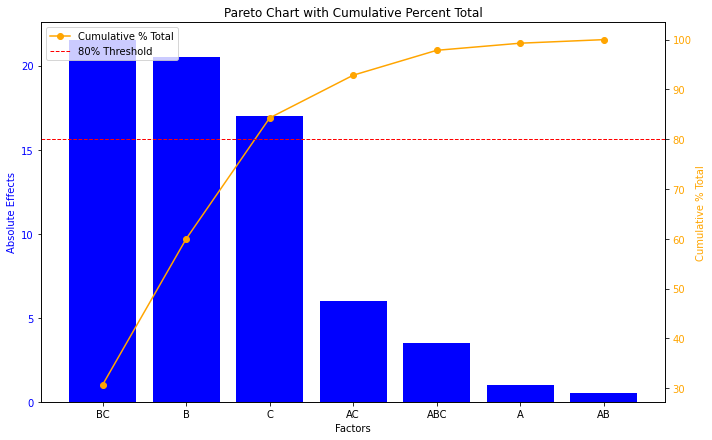

None


In [4]:
for k, v in dict_R_effects.items():
    print(k)
    dict_output=FullFactorial.generate_pareto_chart(v)

    print(dict_output)

Example 4: perform anova analysis

In [5]:
#get just one response
myDict=dict_R_effects[list(dict_R_effects.keys())[0]]

full_factorial.perform_anova(myDict, ['C', 'B' ,'BC'])

OrderedDict([('A', -1.0), ('B', -20.5), ('C', -17.0), ('AB', 0.5), ('AC', -6.0), ('BC', -21.5), ('ABC', -3.5)])

ANOVA
-----------------------------------------
      Source      SS  DF     MS F-value Crit_F Prob>F
0      Model  2343.0   3  781.0    31.6   0.75  <0.01
1          B   840.5   1  840.5    34.0   0.25  <0.01
2          C   578.0   1  578.0    23.4   0.25  <0.01
3         BC   924.5   1  924.5    37.4   0.25  <0.01
4   Residual    99.0   4   24.8                      
5  Cor Total  2442.0   7                             


Example 5: perform coded linear regression analysis

In [6]:
data = {
    'B': [-1, -1, 1, 1, -1, -1, 1, 1],
    'C': [-1, -1, -1, -1, 1, 1, 1, 1],
    'BC': [1, 1, -1, -1, -1, -1, 1, 1],
    'Y': [74, 75, 71, 80, 81, 77, 42, 32]
}

regression_results = FullFactorial.coded_linear_regression(data)

print(regression_results)

{'intercept': 66.5, 'B': -10.25, 'C': -8.5, 'BC': -10.75}


Example 6: plot one- and two-factor effects

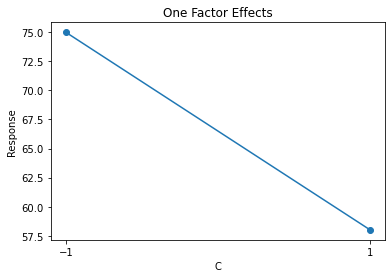

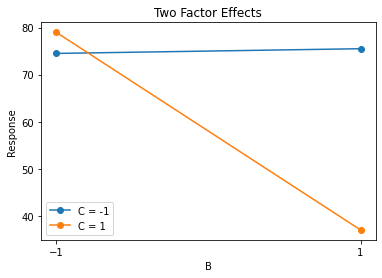

In [7]:
data_one_factor={
                'C': [-1, -1, -1, -1, 1, 1, 1, 1],
                'Y': [74, 75, 71, 80, 81, 77, 42, 32]
                }
data_two_factors={
                'C': [-1, -1, -1, -1, 1, 1, 1, 1],
                'B': [-1, -1, 1, 1, -1, -1, 1, 1],
                'Y': [74, 75, 71, 80, 81, 77, 42, 32]
                }

# Plot one factor effects
FullFactorial.calculate_effects(data_one_factor)

# Plot two factor effects
FullFactorial.calculate_effects(data_two_factors)

Example 7: calculate residuals and predicted values

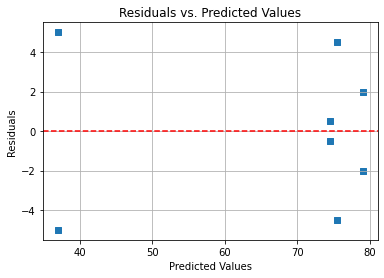

In [8]:
# Coded linear equation coefficients
equation_coefficients = {
    'intercept': 66.5,
    'B': -10.25,
    'C': -8.5,
    'BC': -10.75
}

# The corresponding coded factors and response data
data = {
    'B': [-1, -1, 1, 1, -1, -1, 1, 1],
    'C': [-1, -1, -1, -1, 1, 1, 1, 1],
    'BC': [1, 1, -1, -1, -1, -1, 1, 1],
    'Y': [74, 75, 71, 80, 81, 77, 42, 32]
}

# Calculate residuals and predicted values
results = FullFactorial.calculate_residuals_and_predictions(equation_coefficients, data)

# Scatter plot of residuals versus predicted values
plt.scatter(results['predictions'], results['residuals'], marker='s')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid()
plt.show()